
<div style="text-align: center; color: blue; font-weight: bold; font-size: 20px;">
     Travail réalisé par : ZAONGO Inoussa
</div>

<div style="text-align: center; color: blue; font-weight: bold; font-size: 20px;">
      Etudiant en ISE2
</div>

# <font color='blue'> I- PREPARATION </font>

In [307]:
# chargement des librairies
from pathlib import Path
import matplotlib.pyplot as plt #Visualisation
import missingno as msno #visuation des missing
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from plotly.subplots import make_subplots
from ydata_profiling import ProfileReport
from yellowbrick.regressor import ResidualsPlot

In [309]:
# lien vers la base de données
# Return a new path pointing to the current working directory
data_link = "https://raw.githubusercontent.com/MouslyDiaw/tp-supervised-learning/refs/heads/master/billets.csv"


In [311]:
# importation de la base
#you must put the CSV file billets.csv in data directory, cf above cell
data = pd.read_csv(data_link, sep=";")
data.shape  # data frame dimensions (nb rows, nb columns)

(1500, 7)

# Modelisation

In [314]:
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.diagnostic import het_white , normal_ad

In [316]:
data_model = data.loc[lambda dfr: dfr.margin_low.notnull()]

data_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB


In [318]:
# Création des variables explicatives et cible:
# X est la liste des variables explicatives et y est la variable cible
X = data_model.loc[:, ["diagonal", "height_left", "height_right", "margin_up", "length"]]  # ou data.drop(["margin_low", "is_genuine"], axis=1)
y = data_model.loc[:, 'margin_low']

# TEST/SPLIT

In [321]:
# Séparons nos données en un jeu d'entraînement et un jeu de test :
# 30% des données dans le jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Train set - X: {X_train.shape} ; y: {y_train.shape} \nTest set - X: {X_test.shape} ; y: {y_test.shape}")

Train set - X: (1024, 5) ; y: (1024,) 
Test set - X: (439, 5) ; y: (439,)


# Standardisation

In [324]:
# Standardisons les données :

std_scaler = StandardScaler().fit(X_train)  # Standardize features by removing the mean and scaling to unit variance.
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

# <font color='blue'> II- EXERCICE 1 </font>

In [327]:
# Train and evaluate ridge regression
#elastic_error = train_model(model=linear_model.ElasticNet(fit_intercept=True, alpha=1., l1_ratio=.5),
                           # x_train=X_train_std, y_train=y_train,
                           # x_test=X_test, y_test=y_test)

Dans la cellule précédente, veuillez analyser les variables explicatives: que constatez vous entre le jeu de train et le jeu de test?


Statistiques descriptives pour le jeu de train:
          diagonal   height_left  height_right     margin_up        length
mean -1.272212e-13 -1.526557e-15  1.703152e-14  3.564857e-16  2.862294e-15
std   1.000489e+00  1.000489e+00  1.000489e+00  1.000489e+00  1.000489e+00

Statistiques descriptives pour le jeu de test:
        diagonal  height_left  height_right  margin_up      length
mean  171.951754   104.020456    103.922483   3.143235  112.672802
std     0.315320     0.297897      0.318636   0.232813    0.874626


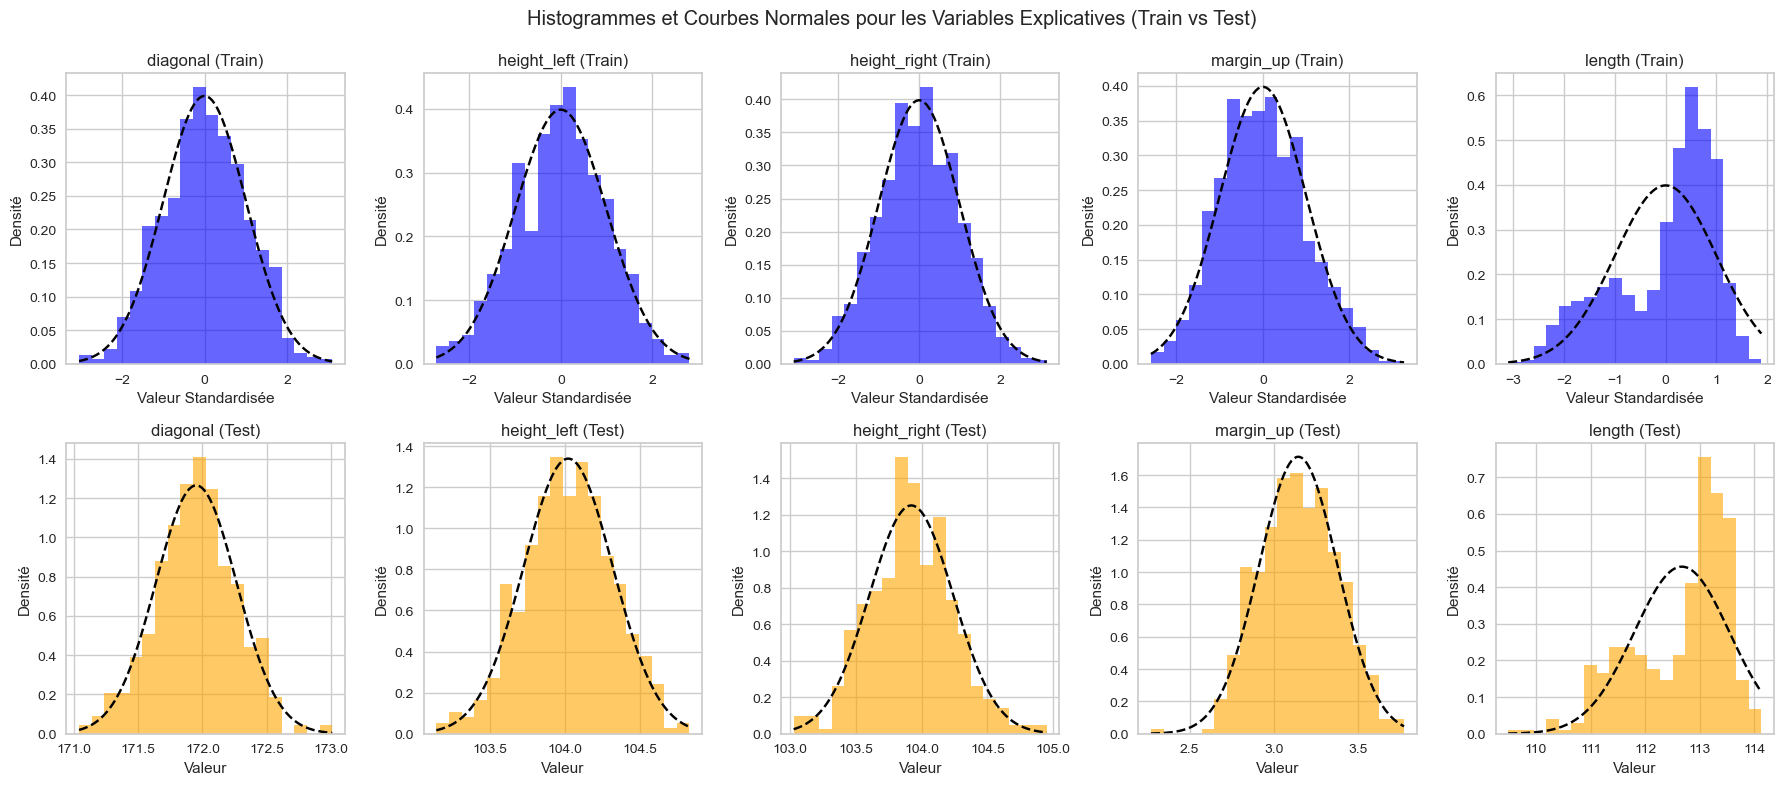

In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Noms des colonnes pour les variables explicatives
columns = ["diagonal", "height_left", "height_right", "margin_up", "length"]

# Conversion des jeux de données fournis en DataFrames pour faciliter la manipulation
# X_train_std : jeu de train standardisé
X_train_std_df = pd.DataFrame(X_train_std, columns=columns)
# X_test : jeu de test original
X_test_df = pd.DataFrame(X_test, columns=columns)

# Calcul des statistiques descriptives
train_stats = X_train_std_df.describe()
test_stats = X_test_df.describe()

print("Statistiques descriptives pour le jeu de train:")
print(train_stats.loc[['mean', 'std']])
print("\nStatistiques descriptives pour le jeu de test:")
print(test_stats.loc[['mean', 'std']])

# Tracer les histogrammes et les courbes normales pour chaque variable
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 8))
fig.suptitle("Histogrammes et Courbes Normales pour les Variables Explicatives (Train vs Test)")

for i, column in enumerate(columns):
    # Jeu de train : histogramme et courbe normale
    ax_train = axes[0, i]
    ax_train.hist(X_train_std_df[column], bins=20, alpha=0.6, color='blue', density=True)
    mean_train, std_train = X_train_std_df[column].mean(), X_train_std_df[column].std()
    x_train = np.linspace(X_train_std_df[column].min(), X_train_std_df[column].max(), 100)
    y_train = stats.norm.pdf(x_train, mean_train, std_train)
    ax_train.plot(x_train, y_train, color='black', linestyle='dashed')
    ax_train.set_title(f"{column} (Train)")
    ax_train.set_xlabel("Valeur Standardisée")
    ax_train.set_ylabel("Densité")
    
    # Jeu de test : histogramme et courbe normale
    ax_test = axes[1, i]
    ax_test.hist(X_test_df[column], bins=20, alpha=0.6, color='orange', density=True)
    mean_test, std_test = X_test_df[column].mean(), X_test_df[column].std()
    x_test = np.linspace(X_test_df[column].min(), X_test_df[column].max(), 100)
    y_test = stats.norm.pdf(x_test, mean_test, std_test)
    ax_test.plot(x_test, y_test, color='black', linestyle='dashed')
    ax_test.set_title(f"{column} (Test)")
    ax_test.set_xlabel("Valeur")
    ax_test.set_ylabel("Densité")

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


Les statistiques descriptives montrent des différences significatives entre le jeu d'entraînement et le jeu de test, en termes de moyenne et d'écart-type pour chaque variable. Voici une analyse détaillée :

### *Jeu de Train*
Les statistiques du jeu de train montrent que :
La moyenne de chaque variable est proche de zéro. ce qui est cohérent avec une standardisation appliquée, où chaque variable est centrée autour de zéro.
L'écart-type est proche de 1 pour chaque variable (environ 1.000489). Cela confirme que le jeu de train a été correctement standardisé, car chaque variable a été normalisée pour avoir une variance unitaire.
### *Jeu de Test*
Pour le jeu de test, on observe :

Des valeurs de moyenne et d'écart-type bien différentes de celles du jeu de train. Les moyennes sont situées autour de valeurs spécifiques (par exemple, 171.95 pour "diagonal" et 3.14 pour "margin_up"), et les écarts-types sont également variés (par exemple, 0.315 pour "diagonal" et 0.875 pour "length").
Il est évident que le jeu de test n’a pas été standardisé comme que le jeu de train. En effet,le le jeu de test est resté avec ses valeurs d’origine.
### *Conclusion et Implications pour le Modèle*
Cette différence de standardisation entre les deux jeux de données peut poser des problèmes pour la modélisation, car le modèle de régression élastique s’appuie sur une standardisation cohérente des variables pour effectuer des comparaisons correctes. Sans la standardisation du jeu de test, les prédictions du modèle risquent d'être biaisées ou inexactes sur ces données.

Pour améliorer les performances et la cohérence du modèle :

Il est recommandé de standardiser le jeu de test avec les mêmes paramètres (moyenne et écart-type) que le jeu de train, en utilisant les valeurs calculées sur le jeu de train.

# <font color='blue'> III- EXERCICE 2 </font>

# 1. Optimisations des hyperparamètres

### Modelisation

In [334]:
# chargement des librairies
from pathlib import Path
import matplotlib.pyplot as plt #Visualisation
import missingno as msno #visuation des missing
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from plotly.subplots import make_subplots
from ydata_profiling import ProfileReport
from yellowbrick.regressor import ResidualsPlot


###modelisation

from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.diagnostic import het_white , normal_ad


In [337]:
# lien vers la base de données
# Return a new path pointing to the current working directory
data_link = "https://raw.githubusercontent.com/MouslyDiaw/tp-supervised-learning/refs/heads/master/billets.csv"


In [339]:
# importation de la base
#you must put the CSV file billets.csv in data directory, cf above cell
data = pd.read_csv(data_link, sep=";")
data.shape  # data frame dimensions (nb rows, nb columns)

(1500, 7)

In [341]:
data_model = data.loc[lambda dfr: dfr.margin_low.notnull()]

data_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB


In [343]:
# Création des variables explicatives et cible:
# X est la liste des variables explicatives et y est la variable cible
X = data_model.loc[:, ["diagonal", "height_left", "height_right", "margin_up", "length"]]  # ou data.drop(["margin_low", "is_genuine"], axis=1)
y = data_model.loc[:, 'margin_low']

### SPLIT

In [346]:
# Séparons nos données en un jeu d'entraînement et un jeu de test :
# 30% des données dans le jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Train set - X: {X_train.shape} ; y: {y_train.shape} \nTest set - X: {X_test.shape} ; y: {y_test.shape}")

Train set - X: (1024, 5) ; y: (1024,) 
Test set - X: (439, 5) ; y: (439,)


In [348]:
# Standardisons les données :

std_scaler = StandardScaler().fit(X_train)  # Standardize features by removing the mean and scaling to unit variance.
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

# RIDGE

Nous allons dans cette partie optimiser les paramètres du modèle ridge afin d'avoir une erreur minimale sur le MSE

In [352]:
# On crée un modèle de régression linéaire
ridge = linear_model.Ridge(alpha=1.)

# On entraîne ce modèle sur les données d'entrainement
ridge.fit(X_train, y_train)

# On récupère l'erreur de norme 2 sur le jeu de données test
ridge_error = np.mean((ridge.predict(X_test) - y_test) ** 2)


# On obtient l'erreur quadratique ci-dessous
print(ridge_error)

0.2162136226425013


Ridge Regression - Meilleur alpha : {'alpha': 10.235310218990268}
Erreur quadratique minimale (MSE) : 0.24030231959087972


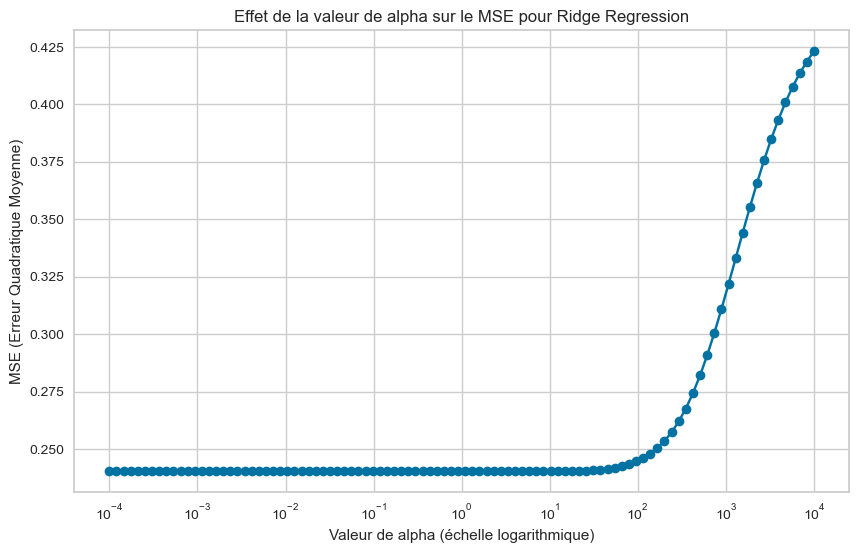

Erreur de test Ridge : 0.2161286013671876


In [354]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Définir la plage de valeurs pour alpha dans le modèle Ridge
ridge_params = {'alpha': np.logspace(-4, 4, 100)}

# Initialiser le modèle Ridge
ridge_model = Ridge()

# Configurer GridSearchCV pour le modèle Ridge
ridge_search = GridSearchCV(ridge_model, ridge_params, scoring='neg_mean_squared_error', cv=5)

# Effectuer la recherche par grille pour le modèle Ridge
ridge_search.fit(X_train, y_train)

# Extraire les résultats de la recherche par grille
alphas = ridge_search.cv_results_['param_alpha'].data
mean_mse_scores = -ridge_search.cv_results_['mean_test_score']

# Afficher le meilleur paramètre alpha et l'erreur quadratique minimale obtenue
print("Ridge Regression - Meilleur alpha :", ridge_search.best_params_)
print("Erreur quadratique minimale (MSE) :", -ridge_search.best_score_)

# Courbe des valeurs d'alpha en fonction du MSE
plt.figure(figsize=(10, 6))
plt.plot(alphas, mean_mse_scores, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Valeur de alpha (échelle logarithmique)')
plt.ylabel('MSE (Erreur Quadratique Moyenne)')
plt.title('Effet de la valeur de alpha sur le MSE pour Ridge Regression')
plt.show()

# Calculer et afficher l'erreur sur les données de test avec le meilleur modèle
best_ridge = ridge_search.best_estimator_
ridge_test_error = mean_squared_error(y_test, best_ridge.predict(X_test))
print("Erreur de test Ridge :", ridge_test_error)


# LASSO

Nous allons dans cette partie optimiser les paramètres du modèle Lasso afin d'avoir une erreur minimale sur le MSE

In [356]:
def train_model(model, x_train, y_train, x_test, y_test):
    # On entraîne ce modèle sur les données d'entrainement
    model.fit(x_train, y_train)
    
    # On récupère l'erreur de norme 2 sur le jeu de données train
    error_train = np.mean((model.predict(x_train) - y_train) ** 2)

    # On récupère l'erreur de norme 2 sur le jeu de données test
    error_test = np.mean((model.predict(x_test) - y_test) ** 2)

    # On obtient l'erreur quadratique ci-dessous
    print(f"Model error: {round(error_test, 5)}")
    return {"estimator": model, "error_train": error_train, "error_test": error_test}

In [357]:
# Train and evaluate ridge regression
lasso_error = train_model(model=linear_model.Lasso(fit_intercept=True, alpha=1.,),
                          x_train=X_train, y_train=y_train,
                          x_test=X_test, y_test=y_test)

Model error: 0.42698


Lasso Regression - Meilleur alpha : {'alpha': 0.0001}
Erreur quadratique minimale (MSE) : 0.2395496570212526


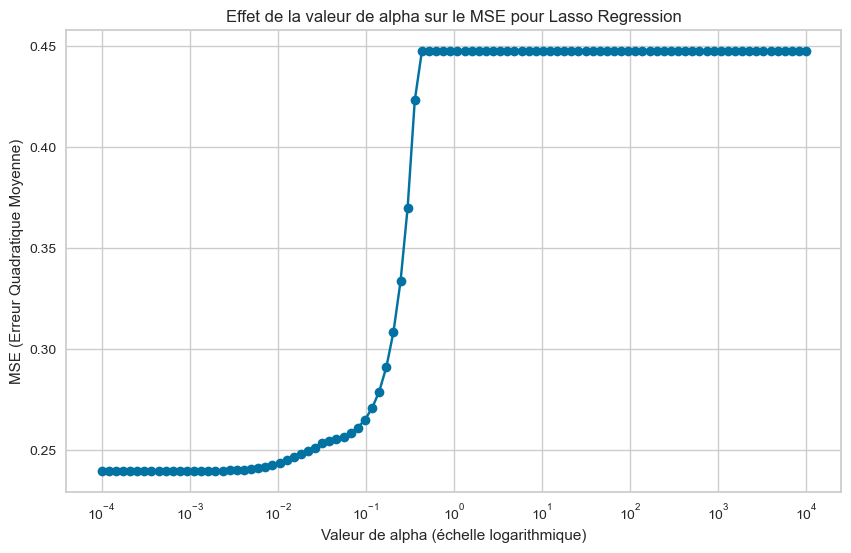

Erreur de test Lasso : 0.21624485583494807


In [358]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

# Définir la plage de valeurs pour alpha dans le modèle Lasso
lasso_params = {'alpha': np.logspace(-4, 4, 100)}

# Initialiser le modèle Lasso
lasso_model = Lasso()

# Configurer GridSearchCV pour le modèle Lasso
lasso_search = GridSearchCV(lasso_model, lasso_params, scoring='neg_mean_squared_error', cv=10)

# Effectuer la recherche par grille pour le modèle Lasso
lasso_search.fit(X_train, y_train)

# Extraire les résultats de la recherche par grille
alphas = lasso_search.cv_results_['param_alpha'].data
mean_mse_scores = -lasso_search.cv_results_['mean_test_score']

# Afficher le meilleur paramètre alpha et l'erreur quadratique minimale obtenue
print("Lasso Regression - Meilleur alpha :", lasso_search.best_params_)
print("Erreur quadratique minimale (MSE) :", -lasso_search.best_score_)

# Courbe des valeurs d'alpha en fonction du MSE
plt.figure(figsize=(10, 6))
plt.plot(alphas, mean_mse_scores, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Valeur de alpha (échelle logarithmique)')
plt.ylabel('MSE (Erreur Quadratique Moyenne)')
plt.title('Effet de la valeur de alpha sur le MSE pour Lasso Regression')
plt.show()

# Calculer et afficher l'erreur sur les données de test avec le meilleur modèle
best_lasso = lasso_search.best_estimator_
lasso_test_error = mean_squared_error(y_test, best_lasso.predict(X_test))
print("Erreur de test Lasso :", lasso_test_error)


# ELASTIC NET

Nous allons dans cette partie optimiser les paramètres du modèle Elastic net afin d'avoir une erreur minimale sur le MSE

In [360]:
# Train and evaluate ridge regression
elastic_error = train_model(model=linear_model.ElasticNet(fit_intercept=True, alpha=1., l1_ratio=.5),
                            x_train=X_train_std, y_train=y_train,
                            x_test=X_test, y_test=y_test)

Model error: 0.42698


Meilleur alpha : 0.013257113655901081
Meilleur l1_ratio : 0.0
Erreur quadratique minimale (MSE) sur validation croisée : 0.24030461323915803


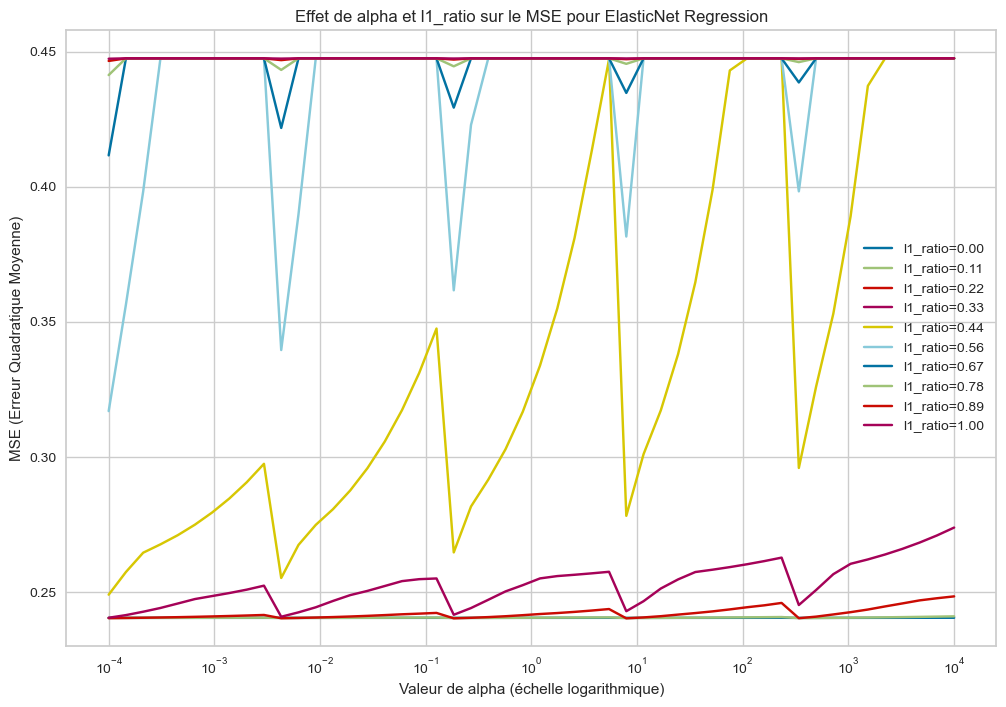

In [364]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.exceptions import ConvergenceWarning

# Ignorer les UserWarning et ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Initialiser le modèle ElasticNet
elastic_net = linear_model.ElasticNet()

# Définir les grilles de paramètres pour alpha et l1_ratio
param_grid = {
    'alpha': np.logspace(-4, 4, 50),  # 50 valeurs de alpha entre 10^-4 et 10^4
    'l1_ratio': np.linspace(0, 1, 10) # 10 valeurs de l1_ratio entre 0 et 1
}

# Configurer la recherche en grille avec validation croisée
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Récupérer les meilleurs paramètres et le modèle optimal
best_elasticnet = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']
best_error = -grid_search.best_score_

# Afficher les meilleurs paramètres et l'erreur correspondante
print(f"Meilleur alpha : {best_alpha}")
print(f"Meilleur l1_ratio : {best_l1_ratio}")
print(f"Erreur quadratique minimale (MSE) sur validation croisée : {best_error}")

# Afficher la variation de l'erreur en fonction de alpha et l1_ratio
mean_test_errors = -grid_search.cv_results_['mean_test_score']
alpha_values = param_grid['alpha']

plt.figure(figsize=(12, 8))
for idx, l1_ratio in enumerate(param_grid['l1_ratio']):
    plt.plot(alpha_values, mean_test_errors[idx*len(alpha_values):(idx+1)*len(alpha_values)], label=f'l1_ratio={l1_ratio:.2f}')

plt.xscale('log')
plt.xlabel('Valeur de alpha (échelle logarithmique)')
plt.ylabel('MSE (Erreur Quadratique Moyenne)')
plt.title('Effet de alpha et l1_ratio sur le MSE pour ElasticNet Regression')
plt.legend()
plt.show()


#  2. ETUDE DE L'IMPORTANCE DES VARIABLES


Importance des variables pour le modèle Ridge Regression :
        Feature  Importance
4        length   -0.409387
2  height_right    0.244336
3     margin_up    0.244044
1   height_left    0.167290
0      diagonal   -0.080171


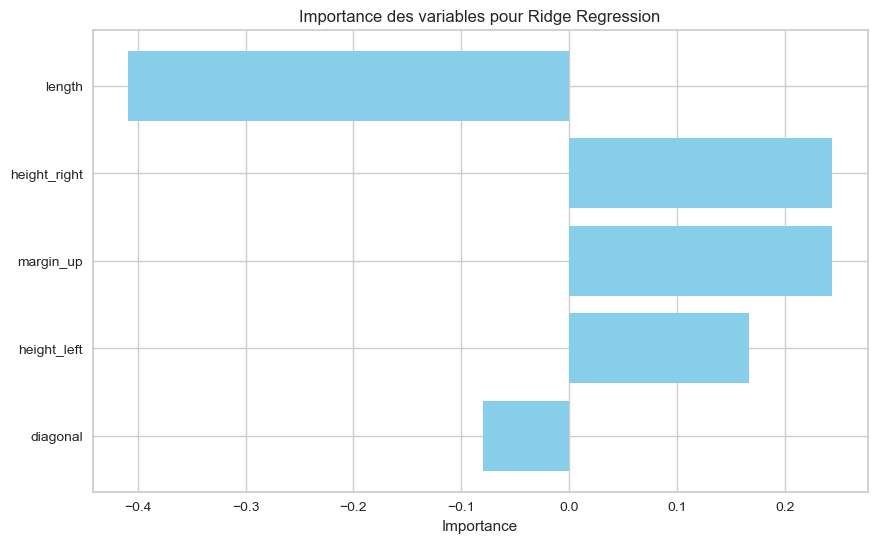


Importance des variables pour le modèle Lasso Regression :
        Feature  Importance
4        length   -0.405300
3     margin_up    0.286305
2  height_right    0.259675
1   height_left    0.175803
0      diagonal   -0.086771


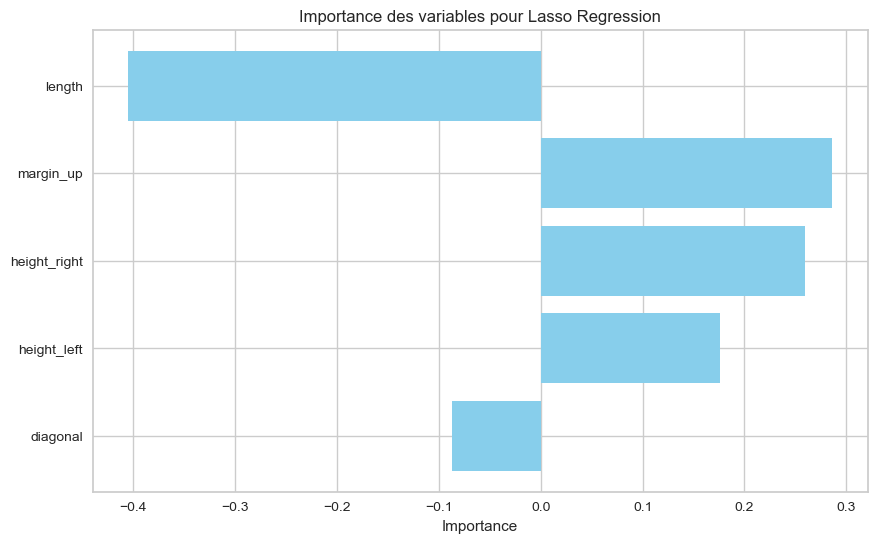


Importance des variables pour le modèle ElasticNet Regression :
        Feature  Importance
4        length   -0.410222
2  height_right    0.239536
3     margin_up    0.233293
1   height_left    0.164359
0      diagonal   -0.077965


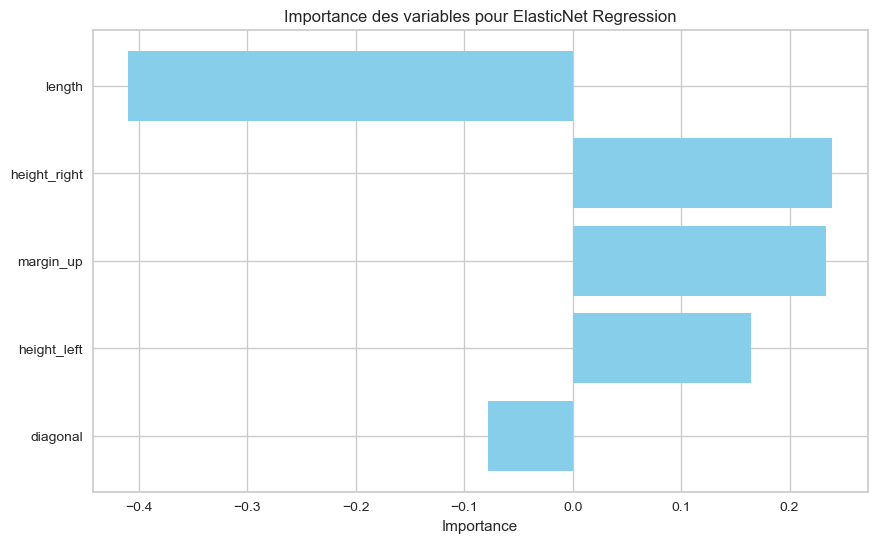

In [366]:
import pandas as pd
import matplotlib.pyplot as plt

# Nom des variables d'entrée (X_train.columns si c'est un DataFrame)
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'feature_{i}' for i in range(X_train.shape[1])]

# Fonction pour afficher les coefficients triés par importance avec un graphique
def display_feature_importance(model, model_name):
    coefficients = model.coef_
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})
    importance_df['Absolute Importance'] = importance_df['Importance'].abs()  # Pour trier par importance absolue
    importance_df = importance_df.sort_values(by='Absolute Importance', ascending=False)
    
    # Affichage des 10 variables les plus importantes
    top_features = importance_df.head(10)  # Modifier ce nombre pour afficher plus ou moins de variables
    
    # Affichage textuel des coefficients
    print(f"\nImportance des variables pour le modèle {model_name} :")
    print(top_features[['Feature', 'Importance']])
    
    # Graphique d'importance des variables
    plt.figure(figsize=(10, 6))
    plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.title(f'Importance des variables pour {model_name}')
    plt.gca().invert_yaxis()  # Inverse l'ordre pour afficher la plus grande importance en haut
    plt.show()

# Afficher les importances des variables pour chaque modèle
display_feature_importance(best_ridge, "Ridge Regression")
display_feature_importance(best_lasso, "Lasso Regression")
display_feature_importance(best_elasticnet, "ElasticNet Regression")
